<a href="https://colab.research.google.com/github/Hyeri1ee/3-1_spurt_copy/blob/main/LayoutParser_layout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LayoutParser

A Python library for Document Image Analysis (DIA)

References:

Official Notebook
https://github.com/Layout-Parser/layout-parser/blob/master/examples/Deep%20Layout%20Parsing.ipynb


Github repo
https://github.com/Layout-Parser/layout-parser

Research paper
https://arxiv.org/abs/2103.15348
https://arxiv.org/pdf/2103.15348.pdf


Dataset
https://arxiv.org/abs/2004.08686



install LayoutParser library from PyPi package. Install other dependencies.

In [1]:
!pip install --upgrade "protobuf>=5.29.1,<6.0.0"

In [2]:
%%bash
pip install -U layoutparser
pip install 'git+https://github.com/facebookresearch/detectron2.git@v0.4#egg=detectron2'
pip install layoutparser[ocr]


  Cloning https://github.com/facebookresearch/detectron2.git (to revision v0.4) to /tmp/pip-install-czs7b1_t/detectron2_ccac82dc2cfa4922ad30bcb00ca2f33a
  Resolved https://github.com/facebookresearch/detectron2.git to commit 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Using cached protobuf-3.20.3-py2.py3-none-any.whl.metadata (720 bytes)
Using cached protobuf-3.20.3-py2.py3-none-any.whl (162 kB)
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5


  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-install-czs7b1_t/detectron2_ccac82dc2cfa4922ad30bcb00ca2f33a
  Running command git checkout -q 4aca4bdaa9ad48b8e91d7520e0d0815bb8ca0fb1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ydf 0.12.0 requires protobuf<6.0.0,>=5.29.1, but you have protobuf 3.20.3 which is incompatible.
google-cloud-bigquery 3.34.0 requires google-api-core[grpc]<3.0.0,>=2.11.1, but you have google-api-core 1.34.1 which is incompatible.
pandas-gbq 0.29.1 requires google-api-core<3.0.0,>=2.10.2, but you have google-api-core 1.34.1 which is incompatible.
dataproc-spark-connect 0.8.1 requires google-api-core>=2.19, but you have google-api-core 1.34.1 which is incompatible.
google-cloud-storage 2.19.0 requires google-api-core<3.0.0dev,>=2.15.0, but you have google-api-core 1.3

Import the libraries

In [12]:
import layoutparser as lp
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import cv2

Clone the source files for example data

In [4]:
!git clone https://github.com/Hyeri1ee/layout-parser.git

fatal: destination path 'layout-parser' already exists and is not an empty directory.


Change directory to read the example data

In [8]:
%cd /content/layout-parser/examples/data/
!ls -p

/content/layout-parser/examples/data
example-table.jpeg  full_3.png	full_5.png  full_7.png
full_2.png	    full_4.png	full_6.png  paper-image.jpg


In [9]:
import os
print(os.getcwd())  # 현재 작업 디렉토리 확인

/content/layout-parser/examples/data


In [10]:
import os
print(os.path.exists("./full_7.png"))

True


Read an image from the source files to infer on it

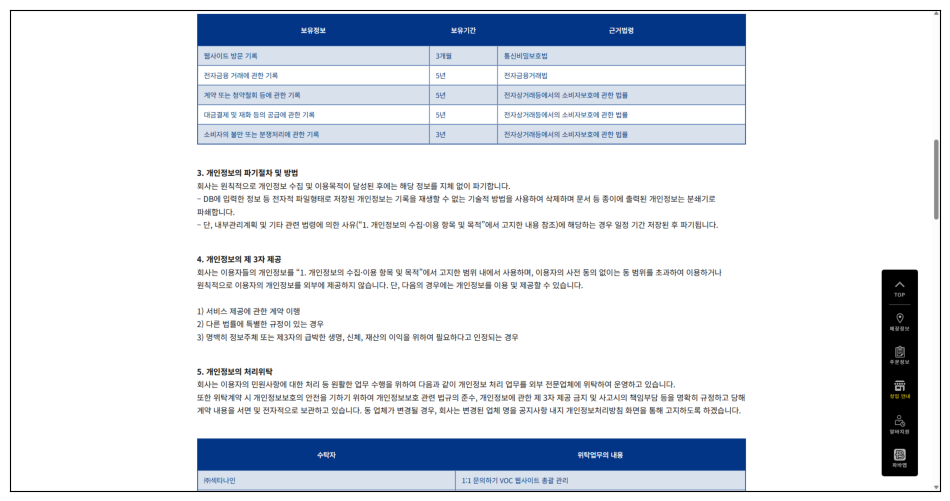

In [13]:
img = cv2.imread("./full_7.png")
# convert BGR image into RGB format
image = img[..., ::-1]
# display image
plt.figure(figsize=(12,16))
plt.imshow(image)
plt.xticks([])
plt.yticks([])
plt.show()

Load a pre-trained Detectron2 model configured for Layout Parsing

In [15]:
!pip install Pillow==9.5.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 26.7 MB/s eta 0:00:00
  Attempting uninstall: Pillow
    Found existing installation: pillow 11.2.1
    Uninstalling pillow-11.2.1:
      Successfully uninstalled pillow-11.2.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires pillow>=10.1, but you have pillow 9.5.0 which is incompatible.


In [14]:
import layoutparser as lp


In [15]:
model = lp.Detectron2LayoutModel('lp://PubLayNet/faster_rcnn_R_50_FPN_3x/config',
                                 extra_config=["MODEL.ROI_HEADS.SCORE_THRESH_TEST", 0.8],
                                 label_map={0: "Text", 1: "Title", 2: "List", 3:"Table", 4:"Figure"})

Infer the layouts for the sample image using the pre-trained model

In [16]:
layout = model.detect(img)

/usr/local/lib/python3.11/dist-packages/torch/functional.py:539: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:3637.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Display the image with infered layouts on it

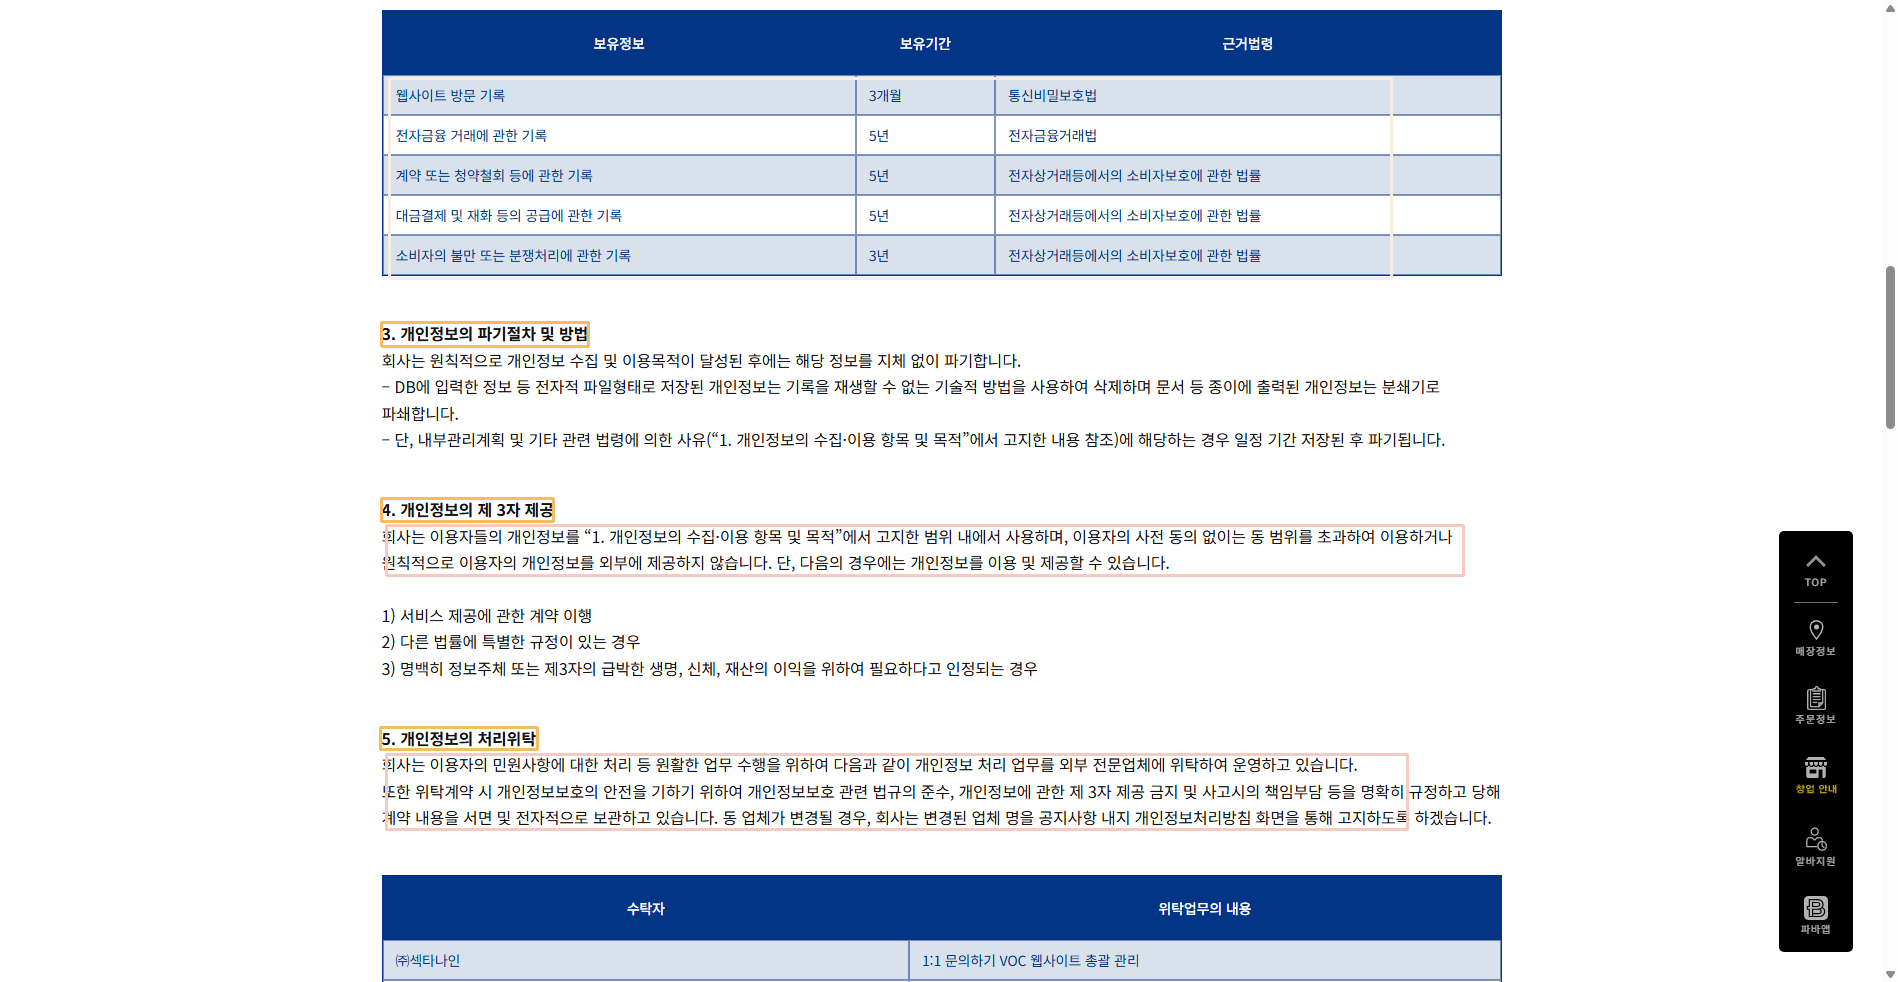

In [17]:
lp.draw_box(image, layout, box_width=3)

Thank you for your time!